# Describe Dataset

#### What does your data contain and what is its background?
The data contains parking citations from the city of LA. 
- 1.3Gb file
- Updated Daily
- Over 9 Million entries
- Collected from 2015 to present
- Each entry is a parking citation that contains information such as Issue Date, Issue Time, Make of the Car, Type of Vehicle, Color of Vehicle, Location, Violation Description, Fine Amount, Latitude and Longitude. 
- The data is managed by Socrata

#### Where does it come from?
This is a dataset hosted by the city of Los Angeles. The organization has an open data platform: 
-     https://data.lacity.org/
-     https://data.lacity.org/A-Well-Run-City/Parking-Citations/wjz9-h9np

#### Why is it interesting or significant?
Parking citations are an important tool used by cities to manage the parking infastructure. There are limited amount of space within each city and parking citations allow the city to help regulate the infrastructure by enforcing the best allocation of space. Another reason why cities utilizes parking citations is because it is a major source of income for the city. 

This dataset can show how much revenue Los Angles has generated through parking citations, show areas that issues the most citations, what kind of citation is the most common, as well as other useful information.  

****
# Analytic Questions
#### I mentioned that there are two main reasons why parking citations are important to the city. First reason being that it helps regulate the parking infracture within the city. Second reason being that it is a major source of income for the city. Knowing that, I am curious to know whether the city of Los Angeles value the revenue generated more than sustaining the parking structure. We cannot definitively say which one they value more than the other (without speaking to the head of the department and asking them their motives) but we can see whether the meter maids behavior changes to increase revenues. I would expect vehicles to recieve consistent citations regardless of the characteristic of the vehicle or time of day. If we see drastic variablity between the characteristics, we can dive deeper to find out if meter maids are unjustly issuing parking citations to increase the city's revenue. 

- What is the average fine amount for the entire dataset?
- How does that compare to the average fine amount split by vehicle color?
- How does that compare to the average fine amount split by vehicle brand?
- How does that compare to the average fine amount split by vehicle type?
- What are the most common parking citation and what are their fine amounts?

****
# Propose Further Research
- Are meter maids issuing higher tickets at the end of the month to meet city quotas? Are they issuing more frequent tickets?
- Is it more based on location and time of day?
- Regression analysis

****
# Potential questions asked during Capstone Review
- Did you have any challenges with this data?
    - I found it difficult to find the decodes for different variables such as color and vehicle make. There were no decodes that were online. I worked around this by looking at the most popular variable codes and grouping the less popular unknown codes into an other bucket.

- Why did you choose this dataset?
    - I chose this dataset because I have never worked with a dataset containing such information and wanted to see what I can learn from it. I also found it very intersting that this information is available and well kept.

- How did your dataset inform the questions you chose to explore?
    - After looking at what the dataset contained I created questions that I could answer based on the available information.

- What issues did you run into while analyzing your data?
    - Not being able to easily run the type of analysis that I would have liked to. I am still learning how to preform certain tasks through python code and would have taken a lot of time to complete a more robust analysis. Originally I wanted to perform a regression analysis, and ended up evaluating deviations from the summary statistics.

- Imagine someone sees this visualization out in the wild, separated from your report. What conclusions would you expect them to draw? Is that the conclusion that you want them to draw?
    - I would expect them to come to the conclusion that parking citations are fairly consistent regardless of how you split the data. 

- How could you make your conclusions more rigorous?
    - By doing a deeper analysis of other factors that can tested, such as variablilty of fine amounts throughout time and location. Using a different statistical approach such as regression analysis.

In [108]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [109]:
#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/los-angeles-parking-citations/parking-citations.csv')

In [110]:
#snapshot info of dataset
df.info()
print("")
print("Counts:")
print(df.count())
#df.head()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9041839 entries, 0 to 9041838
Data columns (total 19 columns):
Ticket number            object
Issue Date               object
Issue time               float64
Meter Id                 object
Marked Time              float64
RP State Plate           object
Plate Expiry Date        float64
VIN                      object
Make                     object
Body Style               object
Color                    object
Location                 object
Route                    object
Agency                   float64
Violation code           object
Violation Description    object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtypes: float64(7), object(12)
memory usage: 1.3+ GB

Counts:
Ticket number            9041839
Issue Date               9041298
Issue time               9039148
Meter Id                 2347355
Marked Time               299801
RP State Plate           9041074
Plate Expiry

# Summary Statistics for Fine Amount

In [111]:
mean_fa = np.round(np.mean(df['Fine amount']),2)
var_fa = np.round(np.var(df['Fine amount']),2)
std_fa = np.round(np.std(df['Fine amount']),2)
min_fa = np.min(df['Fine amount'])
q25_fa = np.nanquantile(df['Fine amount'],.25)
q50_fa = np.nanquantile(df['Fine amount'],.5)
q75_fa = np.nanquantile(df['Fine amount'],.75)
max_fa = np.max(df['Fine amount'])

print("Fine amount mean: " + str(mean_fa))
print("Fine amount variance: " + str(var_fa))
print("Fine amount standard deviation: " + str(std_fa))
print("Fine amount minimum: " + str(min_fa))
print("Fine amount 25% quartile: " + str(q25_fa))
print("Fine amount 50% quartile: " + str(q50_fa))
print("Fine amount 75% quartile: " + str(q75_fa))
print("Fine amount max: " + str(max_fa))


Fine amount mean: 70.11
Fine amount variance: 1032.39
Fine amount standard deviation: 32.13
Fine amount minimum: 10.0
Fine amount 25% quartile: 63.0
Fine amount 50% quartile: 68.0
Fine amount 75% quartile: 73.0
Fine amount max: 505.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ceeec9b0>]],
      dtype=object)

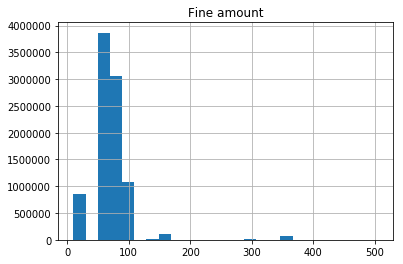

In [112]:
#showing the distribution of Fine amount thoughout the dataset
df.hist(column = 'Fine amount', bins = 25)

# Summary Statistics for Fine Amount Split by Vehicle Color

In [113]:
#Finding top 10 color of vehicles to reorganize dataset to show top 10 and grouping remaining to other category
color_count = df['Color'].value_counts()
top_color = color_count.nlargest(10)
print (top_color)

BK    1949809
WT    1878941
GY    1756398
SL    1129415
BL     702938
RD     447439
GN     256990
BN     177559
GO     118010
MR     108300
Name: Color, dtype: int64


In [114]:
#creating additional column with limited color values
conditions = [
    (df['Color'] == 'BK'),
    (df['Color'] == 'WT'),
    (df['Color'] == 'GY'),
    (df['Color'] == 'SL'),
    (df['Color'] == 'BL'),
    (df['Color'] == 'RD'),
    (df['Color'] == 'GN'),
    (df['Color'] == 'BN'),
    (df['Color'] == 'GO'),
    (df['Color'] == 'MR')
]
choices = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown', 'Gold', 'Maroon']
df['color_lim'] = np.select(conditions, choices, default='Other')

#df.head()

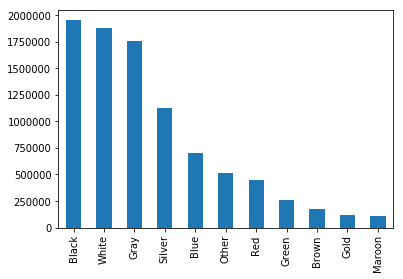

In [115]:
#Visualization of the number of citations based on vehicle color distributions
df['color_lim'].value_counts().plot(kind='bar')

In [116]:
#calulation of summary statistics split by new color grouping. To be compared to highlevel summary statistics for Fine amount
mean_color_lim = df.groupby('color_lim')['Fine amount'].mean()
std_color_lim = df.groupby('color_lim')['Fine amount'].std()
var_color_lim = df.groupby('color_lim')['Fine amount'].var()

print("Fine amount mean: " + str(mean_color_lim))
print()
#print("Fine amount variance: " + str(var_color_lim))
#print()
print("Fine amount standard deviation: " + str(std_color_lim))

Fine amount mean: color_lim
Black     68.792812
Blue      69.383408
Brown     80.705050
Gold      70.398228
Gray      70.051866
Green     69.618646
Maroon    70.530598
Other     72.023078
Red       70.203069
Silver    69.686459
White     70.551845
Name: Fine amount, dtype: float64

Fine amount variance: color_lim
Black     1016.605504
Blue       949.768025
Brown      661.355502
Gold      1238.026159
Gray      1055.197402
Green      877.931032
Maroon    1059.205222
Other     2015.254588
Red        874.955853
Silver     926.924921
White      918.718900
Name: Fine amount, dtype: float64

Fine amount standard deviation: color_lim
Black     31.884252
Blue      30.818307
Brown     25.716833
Gold      35.185596
Gray      32.483802
Green     29.629901
Maroon    32.545433
Other     44.891587
Red       29.579653
Silver    30.445442
White     30.310376
Name: Fine amount, dtype: float64


# Summary Statistics for Fine Amount Split by Vehicle Make

In [117]:
#Finding top 10 make of vehicles to reorganize dataset to show top 10 and grouping remaining to other category
df['Make'].value_counts()
make_count = df['Make'].value_counts()
top_make = make_count.nlargest(10)
print (top_make)

TOYT    1496502
HOND    1018779
FORD     789533
NISS     646079
CHEV     616537
BMW      413267
MERZ     367868
VOLK     309316
HYUN     278337
DODG     264980
Name: Make, dtype: int64


In [118]:
#creating additional column with limited make values
conditions = [
    (df['Make'] == 'TOYT'),
    (df['Make'] == 'HOND'),
    (df['Make'] == 'FORD'),
    (df['Make'] == 'NISS'),
    (df['Make'] == 'CHEV'),
    (df['Make'] == 'BMW'),
    (df['Make'] == 'MERZ'),
    (df['Make'] == 'VOLK'),
    (df['Make'] == 'HYUN'),
    (df['Make'] == 'DODG')
]
choices = ['Toyota', 'Honda', 'Ford', 'Nissan', 'Chevy', 'BMW', 'Mercedes', 'Volkswagen', 'Hyundai', 'Dodge']
df['make_lim'] = np.select(conditions, choices, default='Other')

#df.head()

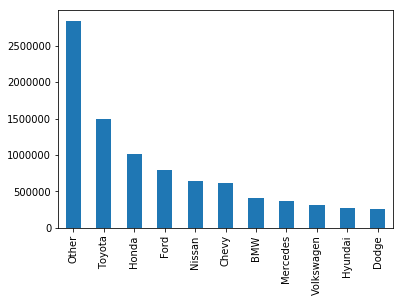

In [119]:
#Visualization of the number of citations based on vehicle make distributions
df['make_lim'].value_counts().plot(kind='bar')

In [120]:
#calulation of summary statistics split by new color grouping. To be compared to highlevel summary statistics for Fine amount
mean_make_lim = df.groupby('make_lim')['Fine amount'].mean()
std_make_lim = df.groupby('make_lim')['Fine amount'].std()
var_make_lim = df.groupby('make_lim')['Fine amount'].var()

print("Fine amount mean: " + str(mean_make_lim))
print()
#print("Fine amount variance: " + str(var_make_lim))
#print()
print("Fine amount standard deviation: " + str(std_make_lim))

Fine amount mean: make_lim
BMW           65.442264
Chevy         70.922228
Dodge         70.678879
Ford          70.440218
Honda         70.141109
Hyundai       70.790202
Mercedes      67.639759
Nissan        71.371940
Other         70.476902
Toyota        70.548458
Volkswagen    67.595527
Name: Fine amount, dtype: float64

Fine amount variance: make_lim
BMW           1033.657513
Chevy         1124.604335
Dodge         1122.174546
Ford          1031.971113
Honda          951.820021
Hyundai        917.746847
Mercedes      1271.284562
Nissan        1039.085130
Other         1121.523630
Toyota         874.616331
Volkswagen     736.585970
Name: Fine amount, dtype: float64

Fine amount standard deviation: make_lim
BMW           32.150545
Chevy         33.535121
Dodge         33.498874
Ford          32.124307
Honda         30.851581
Hyundai       30.294337
Mercedes      35.655078
Nissan        32.234843
Other         33.489157
Toyota        29.573913
Volkswagen    27.140117
Name: Fine amount

# Summary Statistics for Fine Amount Split by Vehicle Type

In [121]:
#Finding top 5 type of vehicles to reorganize dataset to show top 10 and grouping remaining to other category
df['Body Style'].value_counts()
type_count = df['Body Style'].value_counts()
top_type = type_count.nlargest(5)
print (top_type)

PA    7950521
PU     310392
VN     241559
TK     220509
CM     145335
Name: Body Style, dtype: int64


In [122]:
#creating additional column with limited type values
conditions = [
    (df['Body Style'] == 'PA'),
    (df['Body Style'] == 'PU'),
    (df['Body Style'] == 'VN'),
    (df['Body Style'] == 'TK'),
    (df['Body Style'] == 'CM')
]
choices = ['Passenger Auto', 'Pick up', 'Van', 'Truck', 'Commercial']
df['type_lim'] = np.select(conditions, choices, default='Other')

#df.head()

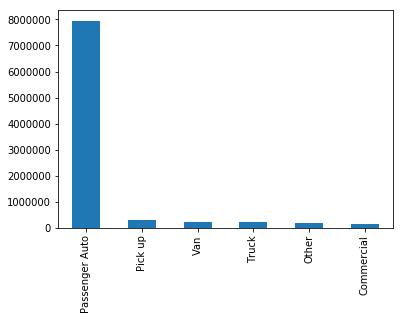

In [123]:
#Visualization of the number of citations based on vehicle type distributions
df['type_lim'].value_counts().plot(kind='bar')

In [137]:
#calulation of summary statistics split by new color grouping. To be compared to highlevel summary statistics for Fine amount
mean_type_lim = df.groupby('type_lim')['Fine amount'].mean()
std_type_lim = df.groupby('type_lim')['Fine amount'].std()
var_type_lim = df.groupby('type_lim')['Fine amount'].var()

print("Fine amount mean: " + str(mean_type_lim))
print()
#print("Fine amount variance: " + str(var_type_lim))
#print()
print("Fine amount standard deviation: " + str(std_type_lim))

Fine amount mean: type_lim
Commercial        82.127077
Other             72.723295
Passenger Auto    69.488321
Pick up           70.857099
Truck             77.785259
Van               73.649680
Name: Fine amount, dtype: float64

Fine amount standard deviation: type_lim
Commercial        25.513000
Other             46.420977
Passenger Auto    31.878144
Pick up           31.684409
Truck             27.821767
Van               33.127604
Name: Fine amount, dtype: float64


# Looking at different types of violations and their fine amount

In [126]:
#Finding top 10 violation_desc to reorganize dataset to show top 10 and grouping remaining to other category
df['Violation Description'].value_counts()
violation_desc_count = df['Violation Description'].value_counts()
top_violation_desc = violation_desc_count.nlargest(10)
print (top_violation_desc)

NO PARK/STREET CLEAN      2615074
METER EXP.                1573531
RED ZONE                   676304
PREFERENTIAL PARKING       622660
DISPLAY OF TABS            556288
NO PARKING                 403333
DISPLAY OF PLATES          249637
WHITE ZONE                 202128
PARKED OVER TIME LIMIT     163415
NO STOP/STANDING           162647
Name: Violation Description, dtype: int64


In [136]:
#finding out how much the fine amount for No park/street clean
#df.loc[lambda df: df['Violation Description'] == 'NO PARK/STREET CLEAN']
#$73

In [135]:
#finding out how much the fine amount for Meter EXP
#df.loc[lambda df: df['Violation Description'] == 'METER EXP.']
#$63

In [133]:
#creating additional column with limited type values
conditions = [
    (df['Violation Description'] == 'NO PARK/STREET CLEAN'),
    (df['Violation Description'] == 'METER EXP.'),
    (df['Violation Description'] == 'RED ZONE'),
    (df['Violation Description'] == 'PREFERENTIAL PARKING'),
    (df['Violation Description'] == 'DISPLAY OF TABS'),
    (df['Violation Description'] == 'NO PARKING'),
    (df['Violation Description'] == 'DISPLAY OF PLATES'),
    (df['Violation Description'] == 'WHITE ZONE'),
    (df['Violation Description'] == 'PARKED OVER TIME LIMIT'),
    (df['Violation Description'] == 'NO STOP/STANDING')
]

choices = ['NO PARK/STREET CLEAN', 'METER EXP.', 'RED ZONE', 'PREFERENTIAL PARKING', 'DISPLAY OF TABS', 'NO PARKING','DISPLAY OF PLATES','WHITE ZONE','PARKED OVER TIME LIMIT','NO STOP/STANDING']
df['violation_desc_lim'] = np.select(conditions, choices, default='Other')

#df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,...,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,color_lim,make_lim,type_lim,violation_desc_lim
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,Gray,Honda,Passenger Auto,Other
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,Other,Other,Van,Other
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,Black,Nissan,Passenger Auto,Other
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,000,17104h,NaN,6440041.1,1802686.2,Other,Other,Passenger Auto,Other
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,Black,Chevy,Passenger Auto,Other


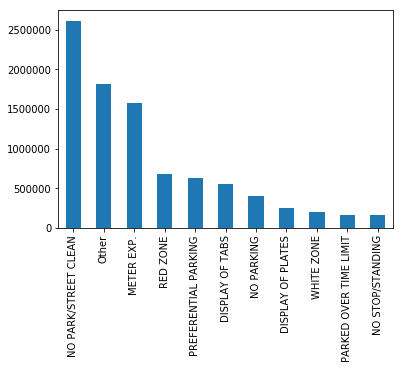

In [134]:
#Visualization of the number of citations based on violation distributions
df['violation_desc_lim'].value_counts().plot(kind='bar')

In [144]:
#calculating the deviation from the mean split by the different groups
color_diff = mean_color_lim - mean_fa
make_diff = mean_make_lim - mean_fa
type_diff = mean_type_lim - mean_fa

print(color_diff)
print()
print(make_diff)
print()
print(type_diff)

color_lim
Black     -1.317188
Blue      -0.726592
Brown     10.595050
Gold       0.288228
Gray      -0.058134
Green     -0.491354
Maroon     0.420598
Other      1.913078
Red        0.093069
Silver    -0.423541
White      0.441845
Name: Fine amount, dtype: float64

make_lim
BMW          -4.667736
Chevy         0.812228
Dodge         0.568879
Ford          0.330218
Honda         0.031109
Hyundai       0.680202
Mercedes     -2.470241
Nissan        1.261940
Other         0.366902
Toyota        0.438458
Volkswagen   -2.514473
Name: Fine amount, dtype: float64

type_lim
Commercial        12.017077
Other              2.613295
Passenger Auto    -0.621679
Pick up            0.747099
Truck              7.675259
Van                3.539680
Name: Fine amount, dtype: float64


Text(0.5, 1.0, 'Deviation from the Mean Split by Vehicle Type')

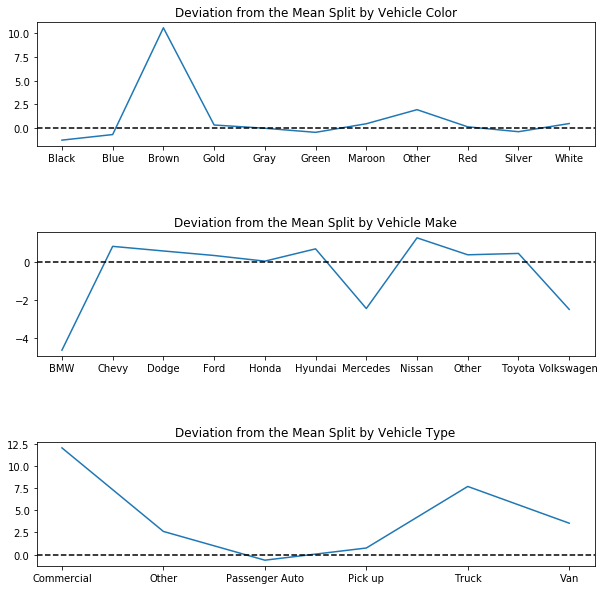

In [166]:
#plotting deviation from the means to better visualize differences
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.plot(color_diff)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Deviation from the Mean Split by Vehicle Color')
plt.subplots_adjust(hspace = 0.7)

plt.subplot(3,1,2)
plt.plot(make_diff)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Deviation from the Mean Split by Vehicle Make')
plt.subplots_adjust(hspace = 0.7)

plt.subplot(3,1,3)
plt.plot(type_diff)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Deviation from the Mean Split by Vehicle Type')